In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
image_generator = ImageDataGenerator(rescale=1/255)

In [3]:
training_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/train/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/validation/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/test/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


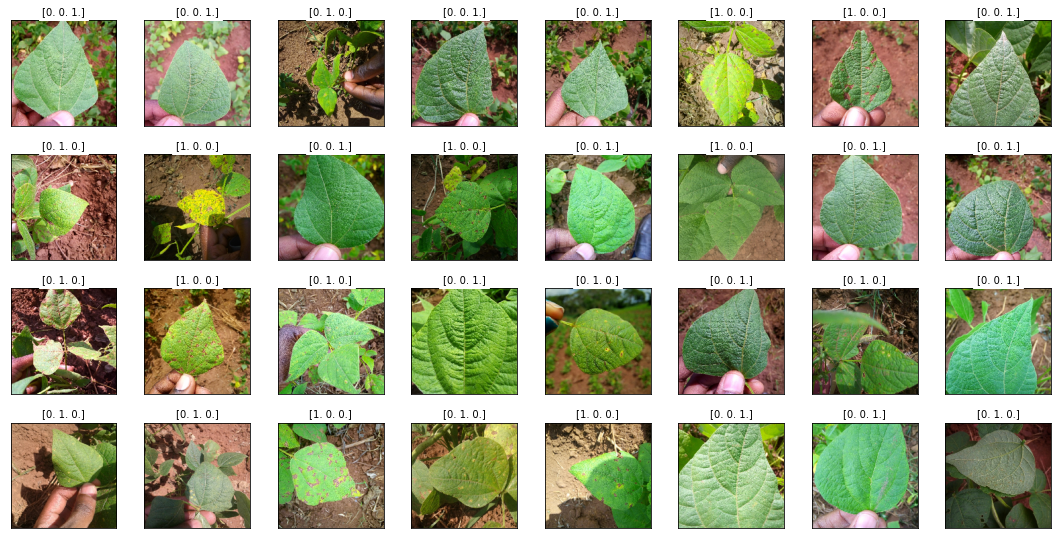

In [4]:
fig = plt.figure(figsize=(15, 15))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

In [5]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224, 3]),                             
                                 keras.layers.Dense(300, activation = 'relu' ),
                                 keras.layers.Dense(100, activation = 'relu' ),
                                 keras.layers.Dense(100, activation = 'relu' ),
                                 keras.layers.Dense(100, activation = 'relu' ),
                                 keras.layers.Dense(3, activation = 'softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 300)               45158700  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 45,209,303
Trainable params: 45,209,303
No

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         restore_best_weights=True)

In [12]:
history = model.fit(training_set, epochs=20, validation_data=validation_set, verbose=1, callbacks=callback)

Epoch 1/20
33/33 [==============================] - 3s 105ms/step - loss: 1.0322 - accuracy: 0.4720 - val_loss: 1.1076 - val_accuracy: 0.3835
Epoch 2/20
33/33 [==============================] - 3s 94ms/step - loss: 1.0010 - accuracy: 0.4778 - val_loss: 1.3464 - val_accuracy: 0.3459
Epoch 3/20
33/33 [==============================] - 3s 98ms/step - loss: 0.9598 - accuracy: 0.5474 - val_loss: 0.8869 - val_accuracy: 0.5789
Epoch 4/20
33/33 [==============================] - 3s 99ms/step - loss: 0.9082 - accuracy: 0.5551 - val_loss: 0.8624 - val_accuracy: 0.5714
Epoch 5/20
33/33 [==============================] - 3s 102ms/step - loss: 0.8915 - accuracy: 0.5764 - val_loss: 0.8237 - val_accuracy: 0.6090
Epoch 6/20
33/33 [==============================] - 3s 103ms/step - loss: 0.9105 - accuracy: 0.5551 - val_loss: 0.8748 - val_accuracy: 0.6015
Epoch 7/20
33/33 [==============================] - 3s 103ms/step - loss: 0.8253 - accuracy: 0.6199 - val_loss: 0.7989 - val_accuracy: 0.6466
Epoch 8/2

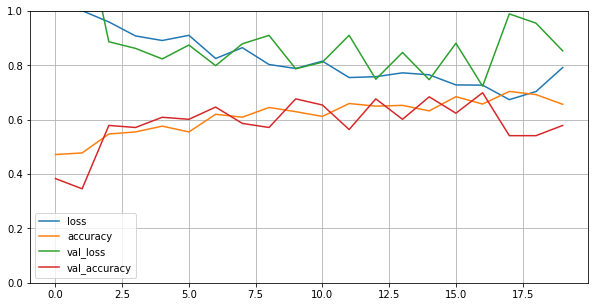

In [13]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
loss, accuracy = model.evaluate(training_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

33/33 [==============================] - 3s 83ms/step - loss: 0.5992 - accuracy: 0.7505
Loss:  0.599195659160614
Accuracy:  0.7504835724830627


In [15]:
loss, accuracy = model.evaluate(testing_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 2s 467ms/step - loss: 0.6900 - accuracy: 0.6875
Loss:  0.6900425553321838
Accuracy:  0.6875
